In [1]:
from fastai import *
from fastai.vision import *
import seaborn as sns
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
path = Path('../input/aptos2019-blindness-detection/')

In [3]:
path.ls()

[PosixPath('../input/aptos2019-blindness-detection/train.csv'),
 PosixPath('../input/aptos2019-blindness-detection/sample_submission.csv'),
 PosixPath('../input/aptos2019-blindness-detection/test.csv'),
 PosixPath('../input/aptos2019-blindness-detection/train_images'),
 PosixPath('../input/aptos2019-blindness-detection/test_images')]

In [4]:
df = pd.read_csv(path/'train.csv')
df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [5]:
df_test = pd.read_csv(path/'test.csv')
df_test.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [6]:
print(len(df))
print(len(df_test))

3662
1928


In [7]:
print(df.isna().sum()) 
print('-' * 20)
print(df_test.isna().sum())

id_code      0
diagnosis    0
dtype: int64
--------------------
id_code    0
dtype: int64


In [8]:
df.diagnosis.value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

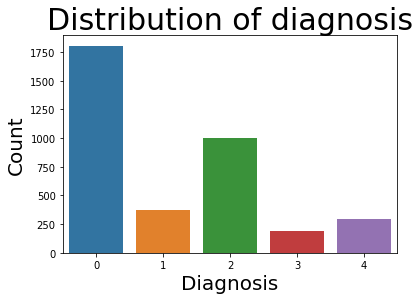

In [9]:
# plot the value counts as histogram
b = sns.countplot(df['diagnosis'])
b.axes.set_title('Distribution of diagnosis', fontsize = 30)
b.set_xlabel('Diagnosis', fontsize = 20)
b.set_ylabel('Count', fontsize = 20)
plt.show()

In [10]:
im = Image.open("../input/aptos2019-blindness-detection/train_images/08b6e3240858.png")

In [11]:
print(im.format, im.size, im.mode)

PNG (2588, 1958) RGB


In [12]:
im = Image.open("../input/aptos2019-blindness-detection/train_images/0ca0aee4d57e.png")

In [13]:
print(im.format, im.size, im.mode)

PNG (4288, 2848) RGB


In [14]:
# plot the various sizes of images
def get_image_sizes(folder):
    image_list = (path/folder).ls()
    heights = []
    widths = []
    ids = []

    for image in image_list:
        im = Image.open(image)
        height, width = im.size
        heights.append(height)
        widths.append(width)
        ids.append(str(image)[-16:-4])
        
    return pd.DataFrame({'id_code': ids,
                         'height': heights,
                         'width': widths})

In [15]:
size_df = get_image_sizes('train_images')
size_df.head()

,id_code,height,width
0,0c43c79e8cfb,2588,1958
1,cd01672507c9,2588,1958
2,3f73c91b7e32,2416,1736
3,8bc6716c2238,2588,1958
4,3abac0961bfd,1050,1050


In [16]:
size_df_test = get_image_sizes('test_images')
size_df_test.head()

,id_code,height,width
0,3d4d693f7983,640,480
1,bc9d8ac89c82,640,480
2,ab59dfa8dfa2,640,480
3,d8ebfa3568ac,2896,1944
4,1e0309115a25,640,480


(array([ 331.,  974.,  108.,   61.,  380., 1171.,   34.,  551.,    0.,   52.]),
 array([ 474. ,  855.4, 1236.8, 1618.2, 1999.6, 2381. , 2762.4, 3143.8, 3525.2, 3906.6, 4288. ]),
 <a list of 10 Patch objects>)

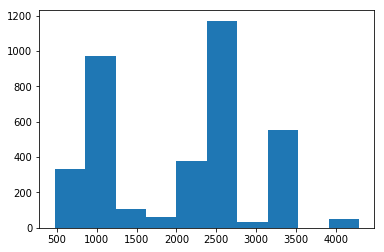

In [17]:
plt.hist(size_df['height'])

(array([1450.,   69.,    0.,    4.,    0.,    0.,   29.,  225.,  140.,   11.]),
 array([ 640. ,  865.6, 1091.2, 1316.8, 1542.4, 1768. , 1993.6, 2219.2, 2444.8, 2670.4, 2896. ]),
 <a list of 10 Patch objects>)

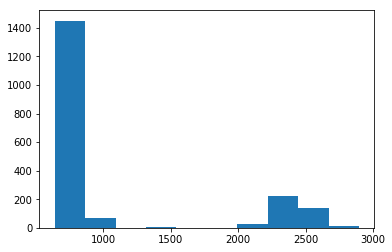

In [18]:
plt.hist(size_df_test['height'])

(array([  44.,  287., 1066.,   77.,  379.,  639.,  567.,  410.,  141.,   52.]),
 array([ 358.,  607.,  856., 1105., 1354., 1603., 1852., 2101., 2350., 2599., 2848.]),
 <a list of 10 Patch objects>)

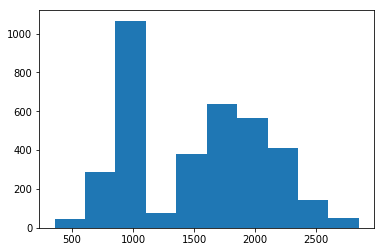

In [19]:
plt.hist(size_df['width'])

(array([1450.,    0.,    0.,   69.,    4.,    0.,    0.,   28.,  226.,  151.]),
 array([ 480. ,  627.8,  775.6,  923.4, 1071.2, 1219. , 1366.8, 1514.6, 1662.4, 1810.2, 1958. ]),
 <a list of 10 Patch objects>)

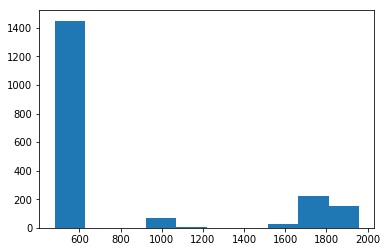

In [20]:
plt.hist(size_df_test['width'])

In [21]:
# plot the images from 0 and 4 to see the difference
df_0 = df[df['diagnosis'] == 0]
df_0.head()

,id_code,diagnosis
3,002c21358ce6,0
4,005b95c28852,0
6,0097f532ac9f,0
10,00cc2b75cddd,0
12,00f6c1be5a33,0


In [22]:
df_4 = df[df['diagnosis'] == 4]
df_4.head()

,id_code,diagnosis
1,001639a390f0,4
5,0083ee8054ee,4
32,0243404e8a00,4
34,02685f13cefd,4
38,02dda30d3acf,4


In [23]:
data = (ImageList.from_df(df_0,path,folder='train_images',suffix='.png')
        .split_by_rand_pct(0.1, seed=42)
        .label_from_df()
        .transform(get_transforms(),size=128)
        .databunch()).normalize(imagenet_stats)

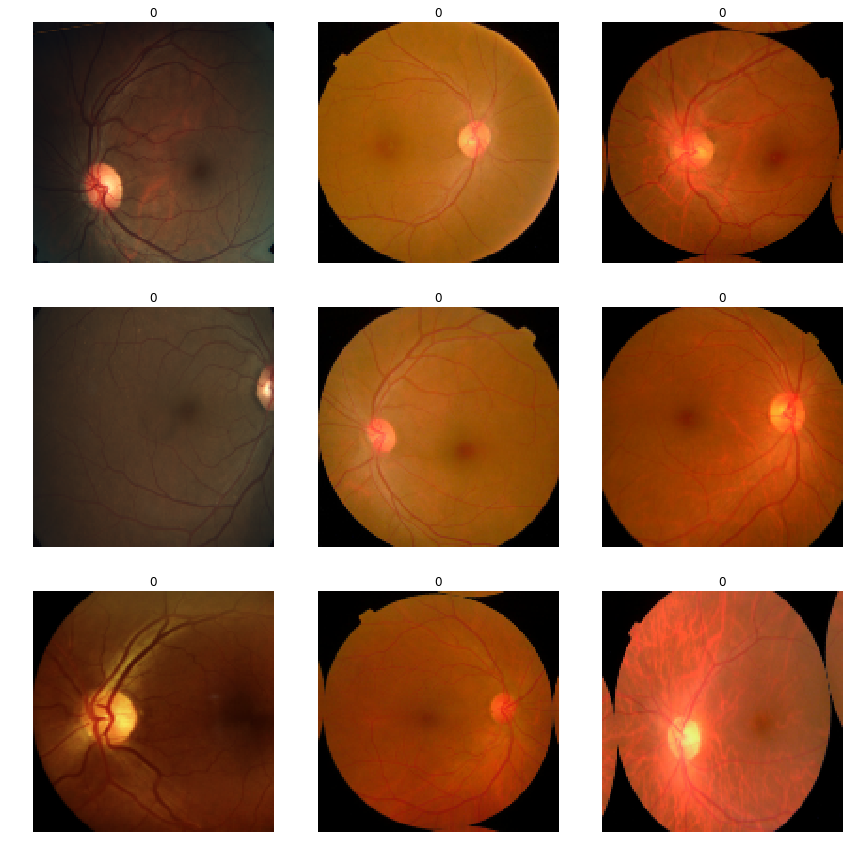

In [24]:
# add figsize argument
data.show_batch(rows=3)

In [25]:
data = (ImageList.from_df(df_4,path,folder='train_images',suffix='.png')
        .split_by_rand_pct(0.1, seed=42)
        .label_from_df()
        .transform(get_transforms(),size=128)
        .databunch()).normalize(imagenet_stats)

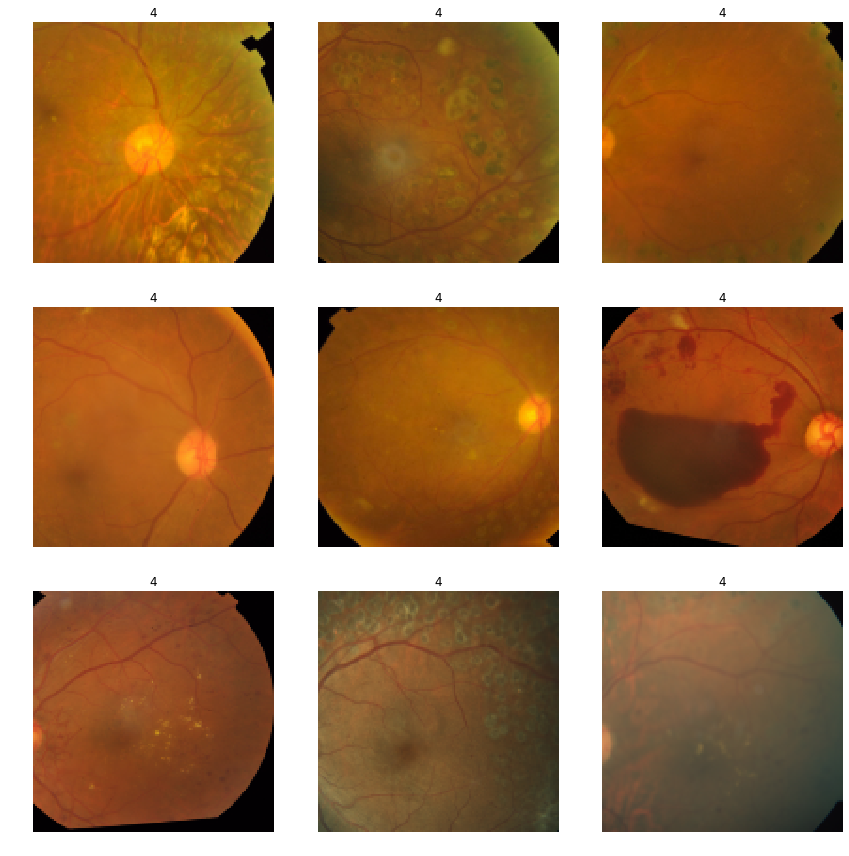

In [26]:
data.show_batch(rows=3)

## Without augmentation

In [27]:
data = (ImageList.from_df(df_4,path,folder='train_images',suffix='.png')
        .split_by_rand_pct(0.1, seed=42)
        .label_from_df()
        .transform([],size=128)
        .databunch()).normalize(imagenet_stats)

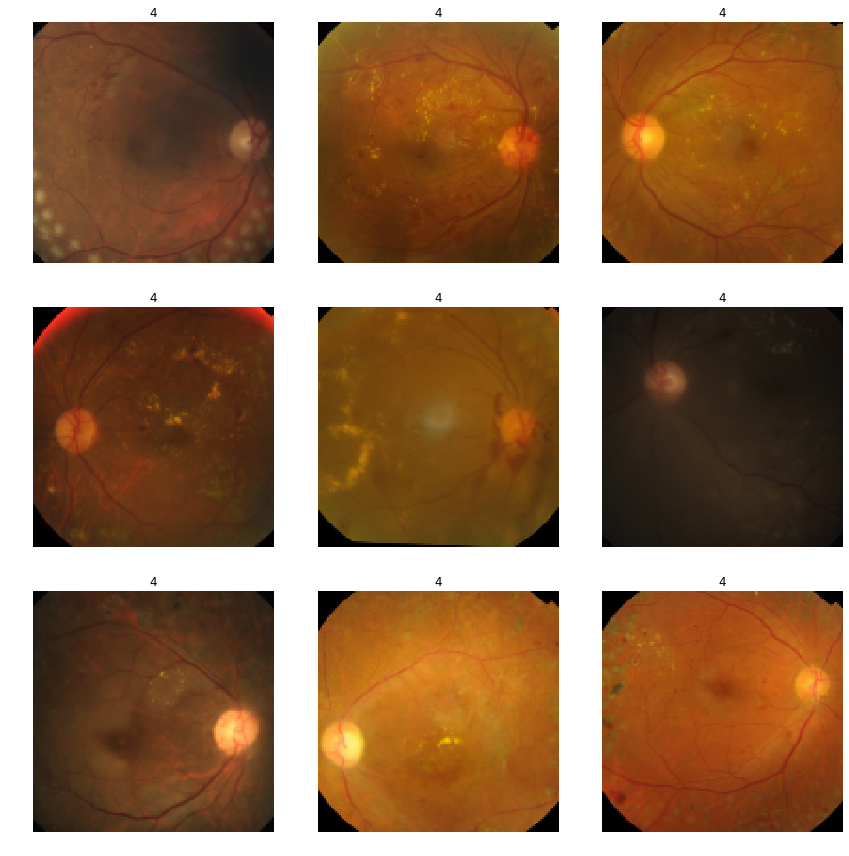

In [28]:
data.show_batch(rows=3, )

In [29]:
# in the next notebook work with various augmentations